### Building a RNN

### Part 1 - Data Preprocessing

#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the Traning Set 

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
len(training_set)

1258

#### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Creating a data structure with 60 timesteps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

#### Reshaping

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Part 2 - Building and Traning the RNN

#### Importing the Keras Libraries and Packages

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the RNN

In [14]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units= 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding a second LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#### Adding a third LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [19]:
regressor.add(Dense(units=1))

#### Compiling the RNN

In [20]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

#### Fitting the RNN to Traning Set

In [21]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100

38/38 [==============================] - 8s 40ms/step - loss: 0.0398
Epoch 2/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0061
Epoch 6/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0047
Epoch 13/100
38/38 [====

### Part 3 - Making the predictions and visualising the results

#### Getting the real stock price of 2017

In [24]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

#### Getting the predicted stock price of 2017

In [39]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [40]:
predicted_stock_price

array([[780.67926],
       [777.8221 ],
       [777.451  ],
       [778.65393],
       [781.97076],
       [787.92664],
       [793.93304],
       [797.06323],
       [797.80646],
       [797.4101 ],
       [796.7868 ],
       [796.22144],
       [795.8669 ],
       [796.25726],
       [797.2128 ],
       [801.4832 ],
       [808.4452 ],
       [816.4025 ],
       [821.48926],
       [818.66595]], dtype=float32)

#### Visualising the Results

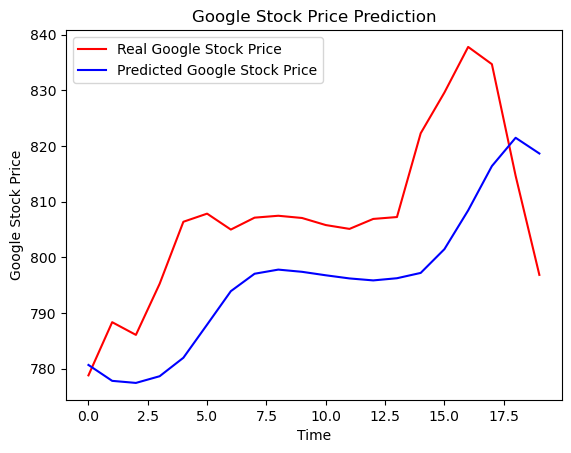

In [43]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#### Evaluation of the Model 

In [44]:
import math
from sklearn.metrics import mean_squared_error
rsme = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [45]:
rsme

16.453001313912996